In [3]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

from scipy.fftpack import fft
from scipy import signal

## Data Preparation

In [4]:
colNames = ['timeStamp', 'c1' ,'c2', 'c3', 'c4', 'a1', 'a2', 'a3', 'ganglionTime']
data = pd.read_csv("../Data/OpenBCI-RAW-Both_arm_c3c4_2019-01-26_18-35-35.txt", sep=',', names=colNames)

In [5]:
data = data[6:]

In [6]:
data.head(5)

,timeStamp,c1,c2,c3,c4,a1,a2,a3,ganglionTime
6,0,-139.20,59.12,270.64,-3223.66,0.0,0.0,0.0,18:39:23.803
7,1,-107.04,69.69,275.43,-3177.39,0.0,0.0,0.0,18:39:23.833
8,2,-112.69,88.39,286.92,-3273.02,0.0,0.0,0.0,18:39:23.833
9,3,-136.61,83.56,295.51,-3274.68,0.0,0.0,0.0,18:39:23.834
10,4,-132.21,56.71,278.88,-3225.64,0.0,0.0,0.0,18:39:23.834


## Time Domain Analysis

<IPython.core.display.Javascript object>


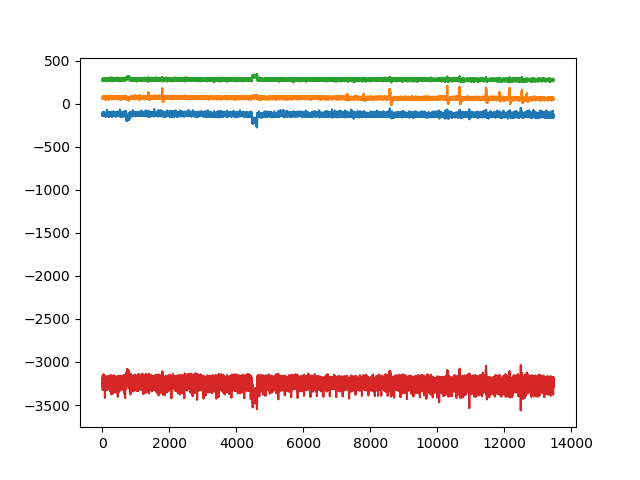

In [8]:
plt.plot(data['c1'])
plt.plot(data['c2'])
plt.plot(data['c3'])
plt.plot(data['c4'])
plt.show()

## Frequency Domain Analysis

In [9]:
# plt.plot(np.log(fft(sig[:20])))

In [10]:
data.shape

(13460, 9)

In [11]:
X = np.array(data.ix[250:, 1:5])
X.shape

C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


(13216, 4)

In [12]:
X

array([[ -113.09,    68.43,   295.68, -3201.44],
       [  -92.73,    77.51,   279.56, -3220.05],
       [ -118.18,    83.39,   292.87, -3250.32],
       ...,
       [ -138.53,    65.92,   286.24, -3281.31],
       [ -155.07,    54.26,   281.53, -3270.6 ],
       [ -132.  ,      nan,      nan,      nan]])

Estimate power spectral density using Welch’s method.

Welch’s method computes an estimate of the power spectral density by dividing the data into overlapping segments, computing a modified periodogram for each segment and averaging the periodograms.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html

In [13]:
freq, y = signal.welch(X.T, fs=200.0) 

In [14]:
y = y.T

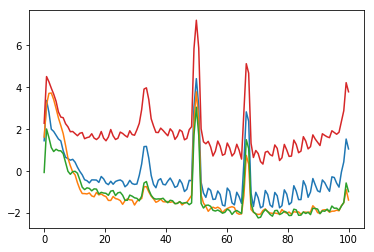

In [15]:
%matplotlib inline
for i in range(y.shape[1]):
    _ = plt.plot(freq, np.log(y[:, i]), label='Channel {}'.format(i+1))

## Spectrogram Analysis

Ganglion Channel Map

<img src="https://raw.githubusercontent.com/OpenBCI/Docs/master/assets/images/ganglion_10-20-positions.png" width="300">

The primary motor cortex, or M1, is one of the principal brain areas involved in motor function. M1 is located in the frontal lobe of the brain, along a bump called the precentral gyrus. 

<br>
<img src=https://qph.fs.quoracdn.net/main-qimg-e16a33548b285152409e11eca5c4df73 width=600>

Frontal Lobe Location

<br>
<img src=https://static1.squarespace.com/static/52f3cf45e4b052b2dabf9b7f/t/52f6c093e4b0b19928bff551/1391902868181/FrontalLobes145753472.jpg?format=1500w width=500>

In [16]:
data.shape

(13460, 9)

In [17]:
X = np.array(data.ix[250:, 1:5])
X.shape

(13216, 4)

In [18]:
sig = X[:, 0]

In [19]:
sig.shape

(13216,)

### Channel 1

In [20]:
# _ = plt.specgram(sig, NFFT=256, Fs=200.0)

In [21]:
# _ = plt.specgram(sig, NFFT=512, Fs=200.0)

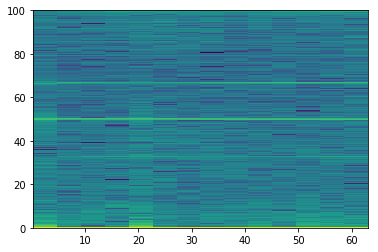

In [22]:
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

### Channel 2

In [23]:
sig = X[:, 1]

In [24]:
# _ = plt.specgram(sig, NFFT=256, Fs=200.0)

In [25]:
# _ = plt.specgram(sig, NFFT=512, Fs=200.0)

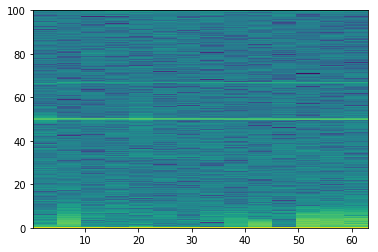

In [26]:
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

### Channel 3

In [27]:
sig = X[:, 2]

In [28]:
# _ = plt.specgram(sig, NFFT=256, Fs=200.0)

In [29]:
# _ = plt.specgram(sig, NFFT=512, Fs=200.0)

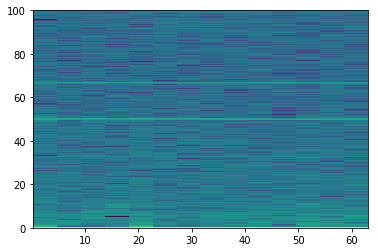

In [30]:
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

### Channel 4

In [31]:
sig = X[:, 3]

In [32]:
# _ = plt.specgram(sig, NFFT=256, Fs=200.0)

In [33]:
# _ = plt.specgram(sig, NFFT=512, Fs=200.0)

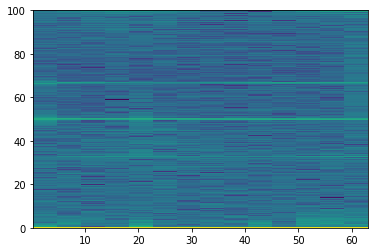

In [34]:
_ = plt.specgram(sig, NFFT=1024, Fs=200.0)

#### As expected, there is significant activity in channel 1 and 2, 30 seconds into the experiment. These channels capture EEG signals in the frontal lobe of the brain, which is associated with motor activity (leg movement). 

- https://www.quora.com/What-part-of-the-brain-controls-leg-movement


#### These waves are in the alpha-beta range since "the subjects were actively engaged in a task (alert), but the task was simple and likely kind of boring (relaxed)"

- https://biology.stackexchange.com/questions/43284/brain-wave-and-motor-movement-correlation